##### 開啟多個檔案，儲存為壓縮檔
這篇教學會將 PyQt5 結合 Python 的 zipfile 標準函式庫，實作一個能透過介面開啟多個檔案，並將多個檔案壓縮為 zip 壓縮檔的應用功能。

##### 在多行輸入框裡顯示檔案路徑 
在畫面中加入兩個 QPushButton 按鈕以及一個 QTextEdit 多行輸入框，在點擊開啟檔案的按鈕時，使用 QFileDialog 選擇檔案，\
並將開啟的檔案路徑加入 fileList 空串列中，最後將串列內容透過換行符合併為文字，由多行輸入框顯示文字內容。

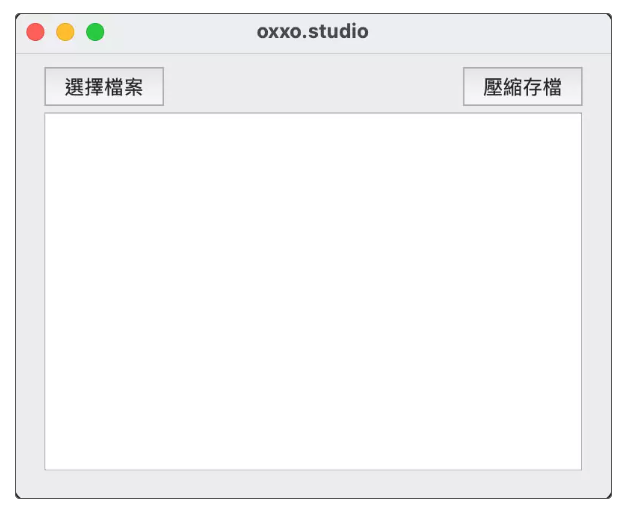

In [ ]:
from PyQt5 import QtWidgets
import sys
import zipfile

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(400, 300)

fileList = []   # 建立最後檔案清單

def open():
    filePath , filterType = QtWidgets.QFileDialog.getOpenFileNames()  # 選擇檔案對話視窗
    print(filePath , filterType)
    # 如果檔案清單裡沒有開啟的檔案，就將檔案路徑存入清單中
    for i in filePath:
        if i not in fileList:
            fileList.append(i)         # 將開啟的檔案添加到輸出清單裡
    output = '\n'.join(fileList)      # 使用換行符號，合併檔案清單為文字
    input.setText(output)             # 多行輸入框中顯示文字

btn1 = QtWidgets.QPushButton(Form)    # 在 Form 中加入一個 QPushButton
btn1.setText('選擇檔案')               # 按鈕文字
btn1.setGeometry(20,5,80,35)
btn1.clicked.connect(open)

input = QtWidgets.QTextEdit(Form)     # QTextEdit 多行輸入框
input.setGeometry(20,40,360,240)
input.setLineWrapMode(input.LineWrapMode.NoWrap) # 設定不要自動換行，除非遇到換行符號

Form.show()
sys.exit(app.exec_())

class 寫法：

In [ ]:
from PyQt5 import QtWidgets
import sys
import zipfile

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(400, 300)
        self.ui()

    def ui(self):
        self.fileList = []

        self.btn1 = QtWidgets.QPushButton(self)
        self.btn1.setText('選擇檔案')
        self.btn1.setGeometry(20,5,80,35)
        self.btn1.clicked.connect(self.open)

        self.btn2 = QtWidgets.QPushButton(self)
        self.btn2.setText('壓縮存檔')
        self.btn2.setGeometry(300,5,80,35)

        self.input = QtWidgets.QTextEdit(self)
        self.input.setGeometry(20,40,360,240)
        self.input.setLineWrapMode(self.input.LineWrapMode.NoWrap)

    def open(self):
        filePath , filterType = QtWidgets.QFileDialog.getOpenFileNames()
        print(filePath , filterType)
        for i in filePath:
            if i not in self.fileList:
                self.fileList.append(i)
        output = '\n'.join(self.fileList)
        self.input.setText(output)

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())

##### 儲存為 ZIP 壓縮檔 
載入 zipfile 標準函式庫，點擊壓縮檔案的按鈕時，根據 fileList 檔案清單裡的路徑，將檔案壓縮成一個 test.zip 檔案。

In [ ]:
from PyQt5 import QtWidgets
import sys
import zipfile

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(400, 300)

fileList = []

def open():
    filePath , filterType = QtWidgets.QFileDialog.getOpenFileNames()
    print(filePath , filterType)
    for i in filePath:
        if i not in fileList:
            fileList.append(i)
    output = '\n'.join(fileList)
    input.setText(output)

def zipFile():
    zf = zipfile.ZipFile('test.zip', mode='w')  # 建立壓縮檔
    for i in fileList:
        zf.write(i)     # 檔案寫入壓縮檔
    zf.close()          # 關閉壓縮檔

btn1 = QtWidgets.QPushButton(Form)
btn1.setText('選擇檔案')
btn1.setGeometry(20,5,80,35)
btn1.clicked.connect(open)

btn2 = QtWidgets.QPushButton(Form)
btn2.setText('壓縮存檔')
btn2.setGeometry(300,5,80,35)
btn1.clicked.connect(zipFile)  # 點擊按鈕時執行壓縮的函式

input = QtWidgets.QTextEdit(Form)
input.setGeometry(20,40,360,240)
input.setLineWrapMode(input.LineWrapMode.NoWrap)

Form.show()
sys.exit(app.exec_())

class 寫法：

In [ ]:
from PyQt5 import QtWidgets
import sys
import zipfile

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(400, 300)
        self.ui()

    def ui(self):
        self.fileList = []

        self.btn1 = QtWidgets.QPushButton(self)
        self.btn1.setText('選擇檔案')
        self.btn1.setGeometry(20,5,80,35)
        self.btn1.clicked.connect(self.open)

        self.btn2 = QtWidgets.QPushButton(self)
        self.btn2.setText('壓縮存檔')
        self.btn2.setGeometry(300,5,80,35)
        self.btn2.clicked.connect(self.zipFile)

        self.input = QtWidgets.QTextEdit(self)
        self.input.setGeometry(20,40,360,240)
        self.input.setLineWrapMode(self.input.LineWrapMode.NoWrap)

    def open(self):
        filePath , filterType = QtWidgets.QFileDialog.getOpenFileNames()
        print(filePath , filterType)
        for i in filePath:
            if i not in self.fileList:
                self.fileList.append(i)
        output = '\n'.join(self.fileList)
        self.input.setText(output)

    def zipFile(self):
        zf = zipfile.ZipFile('test.zip', mode='w')
        for i in self.fileList:
            zf.write(i)
        zf.close()

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())